# Task 2: Predict Future Stock Prices (Short-Term)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [89]:
# Fetch Apple (AAPL) stock data
df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
df.info()
df.describe()
df.shape

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


(1257, 5)

Preprocessing
-check for any null value
-name the unnnamed column

In [90]:
print(df.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [91]:
df = df.rename(columns={df.columns[0]: 'Date'})
print(df.columns)
df.head()

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


# Feature Selction and Labeling

In [92]:
# Features and labels
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split Data

In [93]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [94]:
#Model training Using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
from sklearn.ensemble import RandomForestRegressor
# Model training using Random Forest Regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

# Make Prediction

In [96]:
predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)

In [97]:
from sklearn.metrics import r2_score, mean_squared_error
# Evaluate the model Linear regression
print("R2 Score:", r2_score(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))

# Evaluate the model Random Forest
print("R2 Score (Random Forest):", r2_score(y_test, predictions2))  
print("MSE (Random Forest):", mean_squared_error(y_test, predictions2))

R2 Score: 0.9981993035220024
MSE: 1.1683337384354535
R2 Score (Random Forest): 0.07662743377237602
MSE (Random Forest): 599.1055880050887


# Comparison Between Predicted and Actual Price

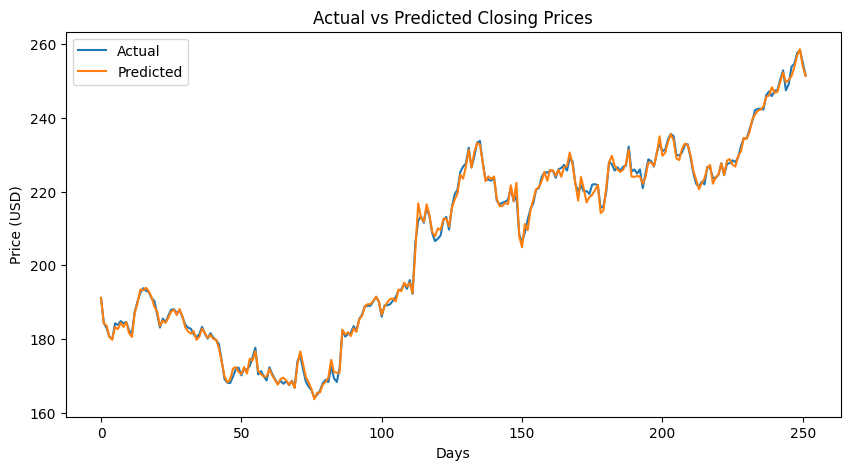

In [98]:
# Compare actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()